In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier #ensemble is used when we are using multiple algorithms to predict output
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

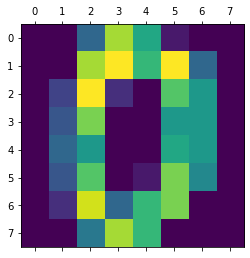

In [3]:
plt.matshow(digits.images[0])     #its a coloured image 

<Figure size 432x288 with 0 Axes>

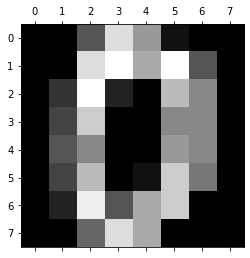

In [5]:
plt.gray()                       #it gray scales the coloured image 

plt.matshow(digits.images[0])     

In [6]:
digits.data[:5]    #its a two dimensional array

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [7]:
df = pd.DataFrame(digits.data)     #it creates a data frame (in this we called digits.data) we used to write in excel 
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [17]:
df['target'] = digits.target #creating a new column in data base and appending it with target values
df

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,targets,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9,9


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'), df['target'],test_size = 0.2,random_state = 10)

In [27]:
y_train

696     2
823     1
608     9
1571    8
579     3
       ..
1393    6
1344    2
527     1
1149    8
1289    2
Name: target, Length: 1437, dtype: int32

In [34]:
model = RandomForestClassifier()
model

RandomForestClassifier()

In [36]:
model.fit(X_train,y_train)   #when we open this using shift+tab we'll find n_estimator 

RandomForestClassifier()

In [37]:
model.score(X_test,y_test)

0.9972222222222222

In [55]:
model1 = RandomForestClassifier(n_estimators = 12)
model1

RandomForestClassifier(n_estimators=12)

In [56]:
model1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=12)

In [57]:
model1.score(X_test,y_test)

0.9833333333333333

In [58]:
y_predicted = model1.predict(X_test)

In [59]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 31,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 38]], dtype=int64)

Text(33.0, 0.5, 'Truth')

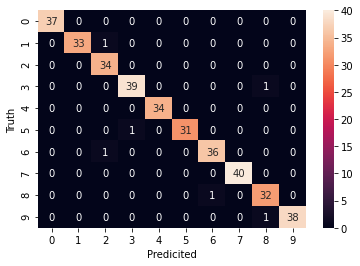

In [61]:
sn.heatmap(cm, annot = True )
plt.xlabel('Predicited')
plt.ylabel('Truth')